# **IPL MATCH PREDICTION USING AI AND ML**

# Goal:
   - Build an ML model to predict IPL match winners
   - Do basic EDA (patterns, toss impact, venue impact, team performance)
   - Use the trained model to estimate IPL 2026 probable winner team

**# 1. Install & Import Required Libraries**

In [52]:
import pandas as pd   # For loading and handling datasets (dataframes)
import numpy as np    # For numerical operations and arrays

import matplotlib.pyplot as plt   # For creating visualizations/plots
import seaborn as sns             # For advanced statistical visualizations

from sklearn.preprocessing import LabelEncoder   # To convert categorical text values into numbers
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.linear_model import LogisticRegression   # Logistic Regression ML algorithm
from sklearn.ensemble import RandomForestClassifier   # Random Forest ML algorithm
from xgboost import XGBClassifier                     # XGBoost ML classifier (advanced boosting algorithm)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# To evaluate model performance (accuracy, precision, recall, confusion matrix)
from IPython.display import display

plt.style.use("seaborn-v0_8")   # plotting style
np.random.seed(42)              # repeatable results


**# 2. Load Dataset**

In [53]:
# from google.colab import drive
# drive.mount('/content/drive')

In [54]:
# from google.colab import files
# uploaded = files.upload()

In [55]:
df = pd.read_csv("IPL.csv")

/tmp/ipython-input-4237585619.py:1: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("IPL.csv")


In [56]:
print("Original Dataset Shape:", df.shape)

Original Dataset Shape: (278205, 64)


In [57]:
display(df.head())

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


**# 3. Basic Info & Missing Values Check**

In [58]:
print("\nDataset Columns:\n", df.columns.tolist())


Dataset Columns:
 ['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings', 'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter', 'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball', 'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary', 'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind', 'player_out', 'fielders', 'runs_target', 'review_batter', 'team_reviewed', 'review_decision', 'umpire', 'umpires_call', 'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner', 'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season', 'gender', 'team_type', 'superover_winner', 'result_type', 'method', 'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number', 'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs', 'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter', 'striker_out']


In [59]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         278205 non-null  int64  
 1   match_id           278205 non-null  int64  
 2   date               278205 non-null  object 
 3   match_type         278205 non-null  object 
 4   event_name         278205 non-null  object 
 5   innings            278205 non-null  int64  
 6   batting_team       278205 non-null  object 
 7   bowling_team       278205 non-null  object 
 8   over               278205 non-null  int64  
 9   ball               278205 non-null  int64  
 10  ball_no            278205 non-null  float64
 11  batter             278205 non-null  object 
 12  bat_pos            278205 non-null  int64  
 13  runs_batter        278205 non-null  int64  
 14  balls_faced        278205 non-null  int64  
 15  bowler             278205 non-null  obje

In [60]:
# Missing Values
df.isnull().sum()

,0
Unnamed: 0,0
match_id,0
date,0
match_type,0
event_name,0
...,...
batter_balls,0
bowler_wicket,0
batting_partners,0
next_batter,264884


In [61]:
print("Total Missing Values in Dataset:", df.isnull().sum().sum())

Total Missing Values in Dataset: 3670259


**# 4. Basic Cleaning**

In [62]:
# Drop unnecessary or ID / umpire columns
cols_to_drop = [
    "id", "match_id",
    "umpire1", "umpire2", "umpire3",
    "batter", "bowler", "non_striker",
    "player_of_match", "player_out", "fielders",
    "review_batter", "team_reviewed", "umpire",
    "next_batter", "striker_out", "new_batter",
    "event_name", "city", "date", "extra_type"
]

In [63]:
df = df.drop(cols_to_drop, axis=1, errors='ignore')

In [64]:
# Drop rows where target (match_won_by) is missing
df = df.dropna(subset=['match_won_by'])
print("After dropping rows with null match_won_by, shape:", df.shape)

After dropping rows with null match_won_by, shape: (278205, 47)


In [65]:
# Fill remaining missing values using forward fill
df = df.fillna(method='ffill')

/tmp/ipython-input-1699561047.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [66]:
print("After forward filling remaining missing values, shape:", df.shape)

After forward filling remaining missing values, shape: (278205, 47)


**# 5. Feature Engineering (Simple, Realistic Features)**

NOTE:
Earlier you used random features (np.random.randint)<br>
which is wrong from an ML point of view (the model receives fake information).<br>
Here we are extracting some simple features directly from the dataset.

In [67]:
# Overs faced (team_balls / balls_per_over)
if {"team_balls", "balls_per_over"}.issubset(df.columns):
    balls_per_over_safe = df["balls_per_over"].replace(0, 1)
    df["overs_faced"] = df["team_balls"] / balls_per_over_safe
else:
    df["overs_faced"] = 0

In [68]:
# Current run rate = team_runs / overs_faced
if "team_runs" in df.columns:
    df["current_run_rate"] = df["team_runs"] / df["overs_faced"].replace(0, 1)
else:
    df["current_run_rate"] = 0

In [69]:
# Wickets in hand = 10 - team_wicket
if "team_wicket" in df.columns:
    df["wickets_in_hand"] = 10 - df["team_wicket"]
else:
    df["wickets_in_hand"] = 0

In [70]:
# Is chasing? (innings == 2 => chasing)
if "innings" in df.columns:
    df["is_chasing"] = (df["innings"] == 2).astype(int)
else:
    df["is_chasing"] = 0

**# 6. Encode Categorical Columns (Label Encoding)**

ML models can only understand numeric data.<br>
Therefore, all object-type columns will be encoded using LabelEncoder.

In [71]:
label_encoders = {}
object_cols = df.select_dtypes(include=["object"]).columns

In [73]:
print("Categorical Columns to Encode:")
print(list(object_cols))

Categorical Columns to Encode:
['match_type', 'batting_team', 'bowling_team', 'wicket_kind', 'review_decision', 'match_won_by', 'win_outcome', 'toss_winner', 'toss_decision', 'venue', 'season', 'gender', 'team_type', 'superover_winner', 'result_type', 'method', 'event_match_no', 'stage', 'match_number', 'batting_partners']


In [74]:
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [75]:
print("After Label Encoding:")
display(df.head())

After Label Encoding:


,Unnamed: 0,match_type,innings,batting_team,bowling_team,over,ball,ball_no,bat_pos,runs_batter,...,team_balls,team_wicket,batter_runs,batter_balls,bowler_wicket,batting_partners,overs_faced,current_run_rate,wickets_in_hand,is_chasing
0,131970,0,1,8,16,0,1,0.1,1,0,...,1,0,0,1,0,1288,0.166667,6.0,10,0
1,131971,0,1,8,16,0,2,0.2,2,0,...,2,0,0,1,0,1288,0.333333,3.0,10,0
2,131972,0,1,8,16,0,3,0.3,2,0,...,2,0,0,1,0,1288,0.333333,6.0,10,0
3,131973,0,1,8,16,0,3,0.3,2,0,...,3,0,0,2,0,1288,0.500000,4.0,10,0
4,131974,0,1,8,16,0,4,0.4,2,0,...,4,0,0,3,0,1288,0.666667,3.0,10,0


In [76]:
# Team label encoder (for decoding later)
team_le = label_encoders["match_won_by"]
team_id_to_name = {team_le.transform([name])[0]: name for name in team_le.classes_}

In [77]:
print("Team ID -> Team Name Mapping:")
print(team_id_to_name)

Team ID -> Team Name Mapping:
{np.int64(0): 'Chennai Super Kings', np.int64(1): 'Deccan Chargers', np.int64(2): 'Delhi Capitals', np.int64(3): 'Delhi Daredevils', np.int64(4): 'Gujarat Lions', np.int64(5): 'Gujarat Titans', np.int64(6): 'Kings XI Punjab', np.int64(7): 'Kochi Tuskers Kerala', np.int64(8): 'Kolkata Knight Riders', np.int64(9): 'Lucknow Super Giants', np.int64(10): 'Mumbai Indians', np.int64(11): 'Pune Warriors', np.int64(12): 'Punjab Kings', np.int64(13): 'Rajasthan Royals', np.int64(14): 'Rising Pune Supergiant', np.int64(15): 'Rising Pune Supergiants', np.int64(16): 'Royal Challengers Bangalore', np.int64(17): 'Royal Challengers Bengaluru', np.int64(18): 'Sunrisers Hyderabad', np.int64(19): 'Unknown'}


**# 7. Exploratory Data Analysis (EDA)**

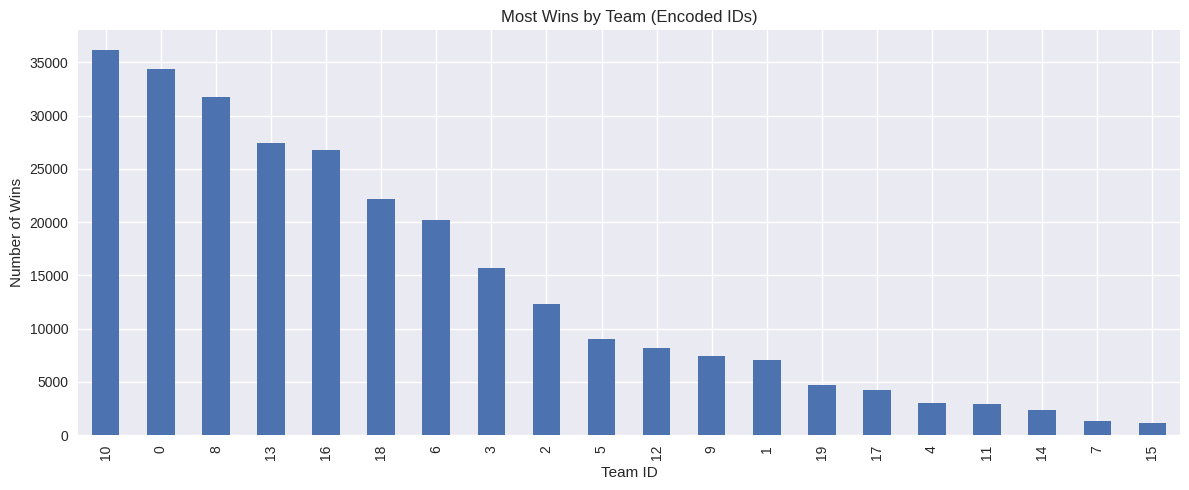

In [78]:
# Most Wins by Team
plt.figure(figsize=(12, 5))
df["match_won_by"].value_counts().plot(kind="bar")
plt.title("Most Wins by Team (Encoded IDs)")
plt.xlabel("Team ID")
plt.ylabel("Number of Wins")
plt.tight_layout()
plt.show()

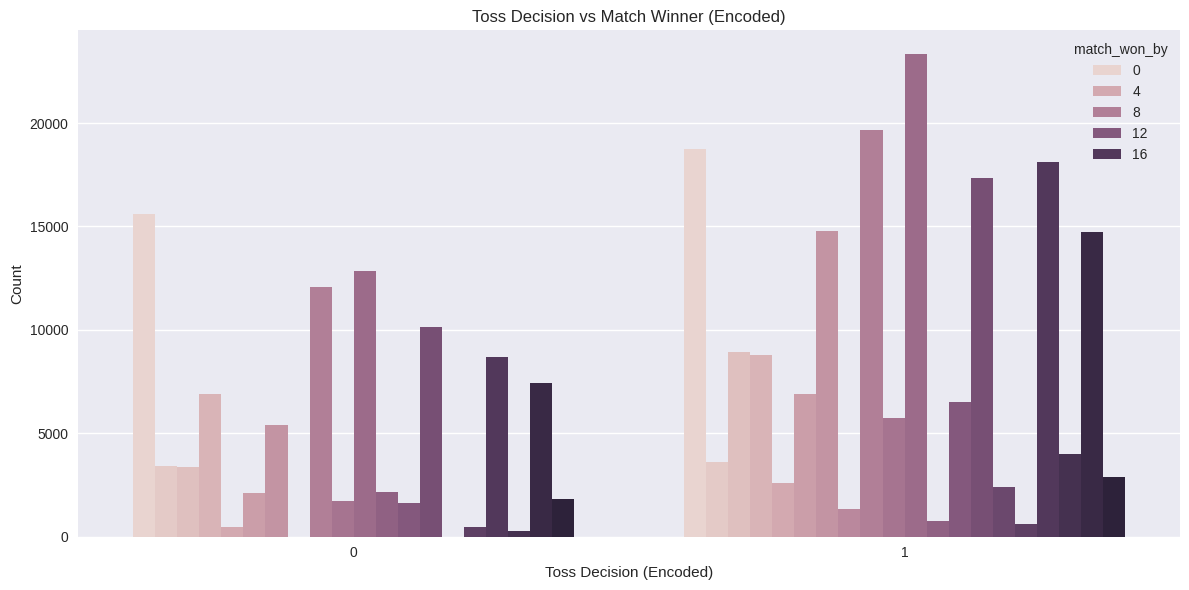

In [79]:
# Toss Decision Impact
if {"toss_decision", "match_won_by"}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.countplot(x="toss_decision", hue="match_won_by", data=df)
    plt.title("Toss Decision vs Match Winner (Encoded)")
    plt.xlabel("Toss Decision (Encoded)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

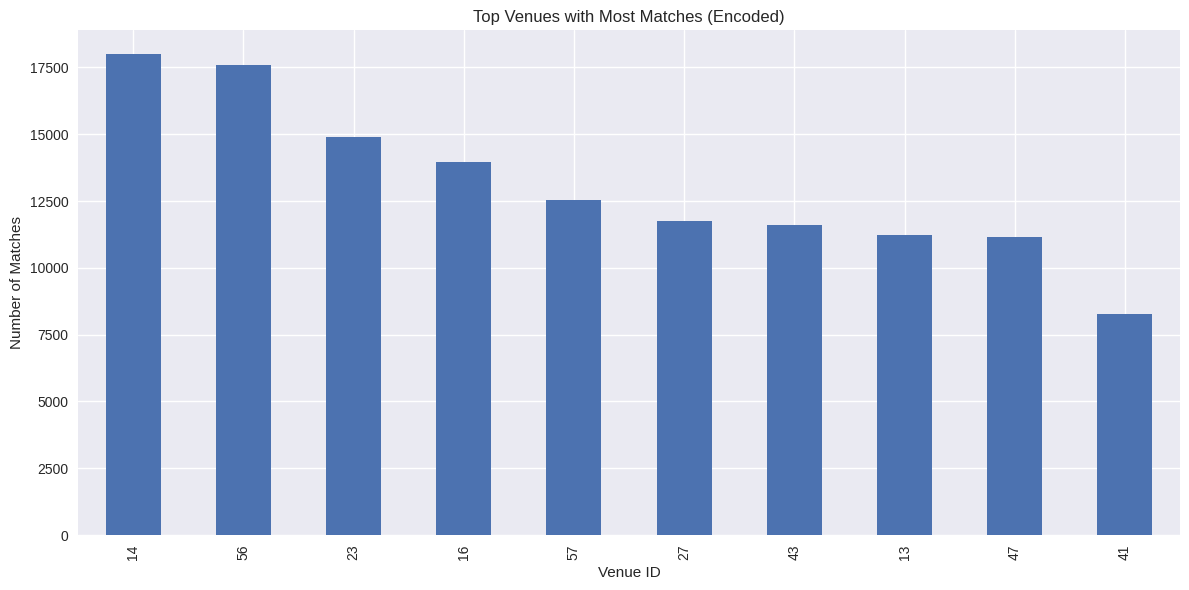

In [80]:
# Top Venues
if "venue" in df.columns:
    top_venues = df["venue"].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    top_venues.plot(kind="bar")
    plt.title("Top Venues with Most Matches (Encoded)")
    plt.xlabel("Venue ID")
    plt.ylabel("Number of Matches")
    plt.tight_layout()
    plt.show()

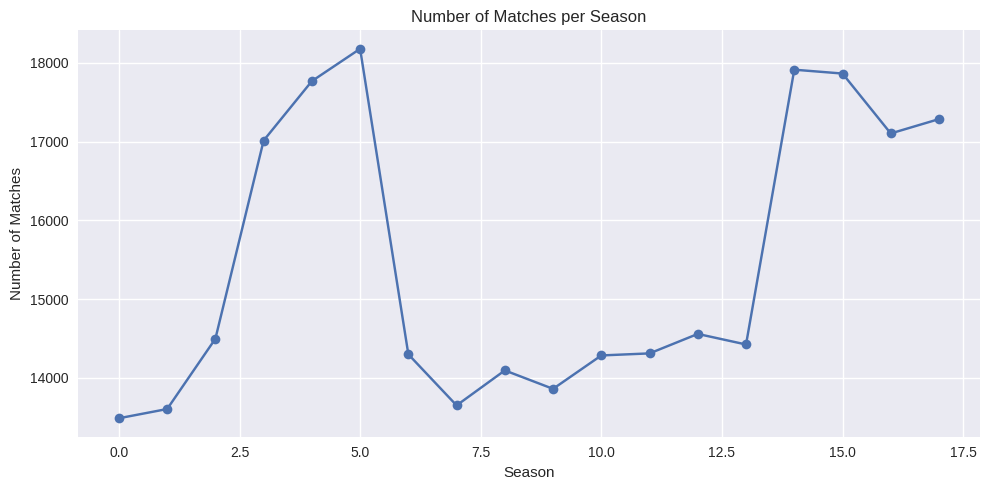

In [81]:
# Matches per season
if "season" in df.columns:
    df["season"] = pd.to_numeric(df["season"], errors="coerce")
    df = df.dropna(subset=["season"])
    df["season"] = df["season"].astype(int)

    plt.figure(figsize=(10, 5))
    df["season"].value_counts().sort_index().plot(kind="line", marker="o")
    plt.title("Number of Matches per Season")
    plt.xlabel("Season")
    plt.ylabel("Number of Matches")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

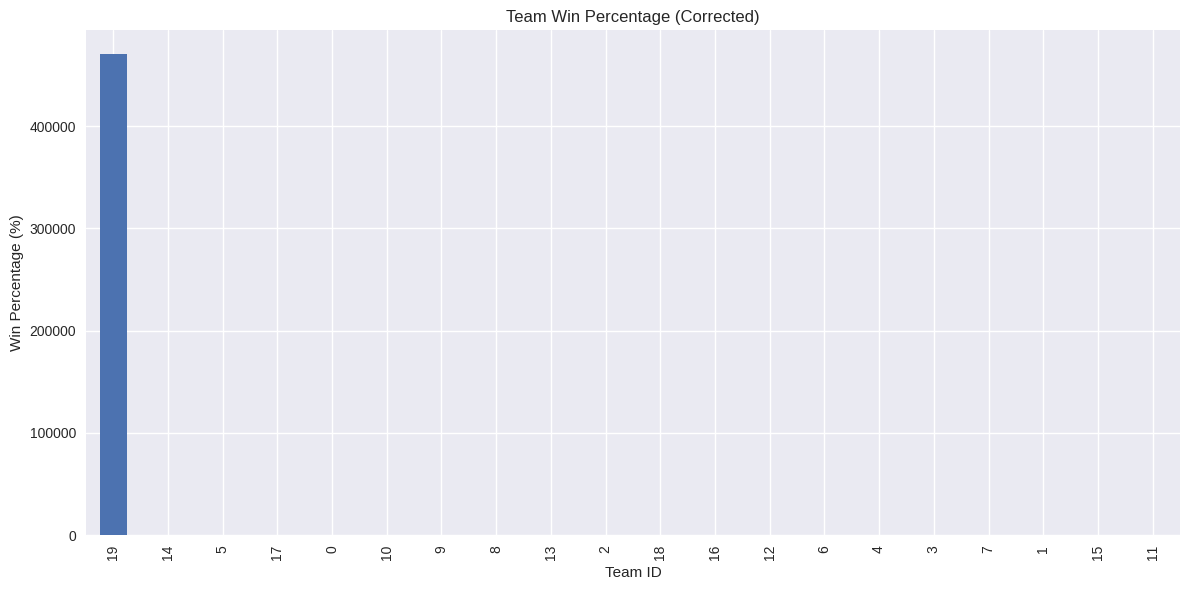


Corrected Win Percentage (Encoded Team IDs):
match_won_by
19    470200.000000
14        62.251829
5         62.171871
17        60.036780
0         56.712207
10        54.209738
9         52.777383
8         51.123034
13        48.945042
2         48.217717
18        47.405650
16        47.382565
12        46.750716
6         44.676372
4         43.074111
3         41.878382
7         41.364205
1         38.803740
15        34.585290
11        26.449541
Name: count, dtype: float64

Win Percentage with Team Names:
Unknown: 470200.00%
Rising Pune Supergiant: 62.25%
Gujarat Titans: 62.17%
Royal Challengers Bengaluru: 60.04%
Chennai Super Kings: 56.71%
Mumbai Indians: 54.21%
Lucknow Super Giants: 52.78%
Kolkata Knight Riders: 51.12%
Rajasthan Royals: 48.95%
Delhi Capitals: 48.22%
Sunrisers Hyderabad: 47.41%
Royal Challengers Bangalore: 47.38%
Punjab Kings: 46.75%
Kings XI Punjab: 44.68%
Gujarat Lions: 43.07%
Delhi Daredevils: 41.88%
Kochi Tuskers Kerala: 41.36%
Deccan Chargers: 38.80%
Ris

In [82]:
# Team Win Percentage

team_wins = df["match_won_by"].value_counts()

team_matches = (
    df["batting_team"].value_counts() +
    df["bowling_team"].value_counts()
)

# indices align karne ke liye
team_matches = team_matches.reindex(team_wins.index, fill_value=1)

win_percentage = (team_wins / team_matches) * 100

plt.figure(figsize=(12, 6))
win_percentage.sort_values(ascending=False).plot(kind="bar")
plt.title("Team Win Percentage (Corrected)")
plt.xlabel("Team ID")
plt.ylabel("Win Percentage (%)")
plt.tight_layout()
plt.show()

print("\nCorrected Win Percentage (Encoded Team IDs):")
print(win_percentage.sort_values(ascending=False))

print("\nWin Percentage with Team Names:")
for team_id, wp in win_percentage.sort_values(ascending=False).items():
    print(f"{team_id_to_name.get(team_id, 'Unknown')}: {wp:.2f}%")

In [83]:
# Problem : Team ID = 19 ka Win % = 4,70,200% (Impossible Value)

In [84]:
print(label_encoders["match_won_by"].inverse_transform([19]))

['Unknown']


In [85]:
# We can remove it

df = df[df["match_won_by"] != 19]
df = df[df["batting_team"] != 19]
df = df[df["bowling_team"] != 19]

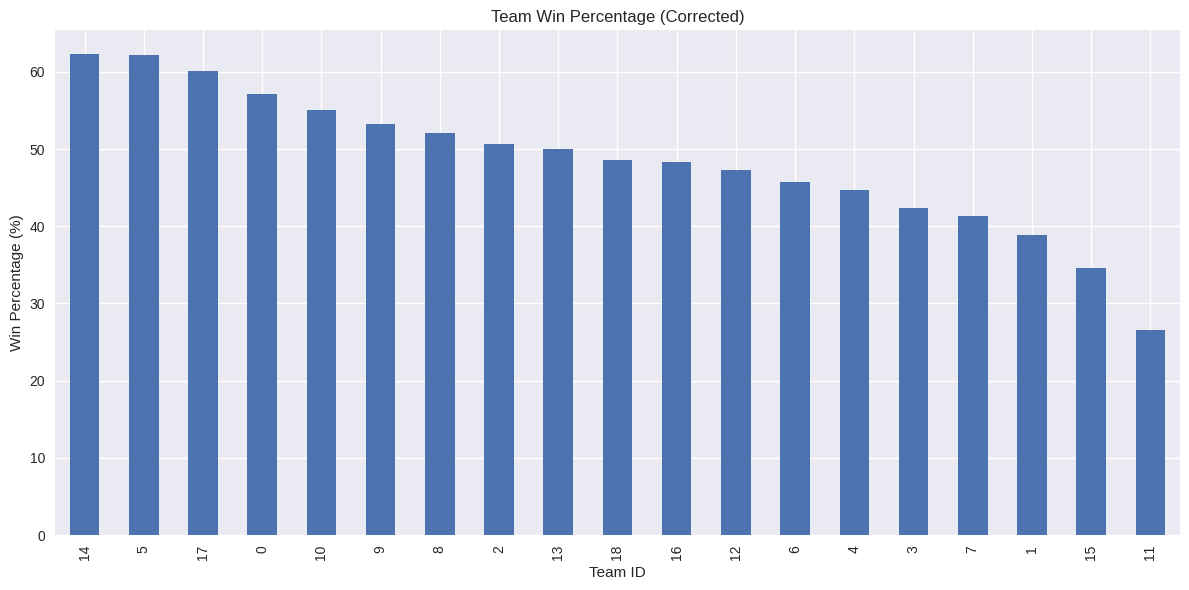


Corrected Win Percentage (Encoded Team IDs):
match_won_by
14    62.251829
5     62.171871
17    60.036780
0     57.067194
10    55.070236
9     53.223496
8     52.104442
2     50.646676
13    50.040082
18    48.595776
16    48.311852
12    47.273570
6     45.732302
4     44.728388
3     42.388019
7     41.364205
1     38.803740
15    34.585290
11    26.603303
Name: count, dtype: float64

Win Percentage with Team Names:
Rising Pune Supergiant: 62.25%
Gujarat Titans: 62.17%
Royal Challengers Bengaluru: 60.04%
Chennai Super Kings: 57.07%
Mumbai Indians: 55.07%
Lucknow Super Giants: 53.22%
Kolkata Knight Riders: 52.10%
Delhi Capitals: 50.65%
Rajasthan Royals: 50.04%
Sunrisers Hyderabad: 48.60%
Royal Challengers Bangalore: 48.31%
Punjab Kings: 47.27%
Kings XI Punjab: 45.73%
Gujarat Lions: 44.73%
Delhi Daredevils: 42.39%
Kochi Tuskers Kerala: 41.36%
Deccan Chargers: 38.80%
Rising Pune Supergiants: 34.59%
Pune Warriors: 26.60%


In [86]:
# Now Team Win Percentage

team_wins = df["match_won_by"].value_counts()

team_matches = (
    df["batting_team"].value_counts() +
    df["bowling_team"].value_counts()
)
team_matches = team_matches.reindex(team_wins.index, fill_value=1)

win_percentage = (team_wins / team_matches) * 100

plt.figure(figsize=(12, 6))
win_percentage.sort_values(ascending=False).plot(kind="bar")
plt.title("Team Win Percentage (Corrected)")
plt.xlabel("Team ID")
plt.ylabel("Win Percentage (%)")
plt.tight_layout()
plt.show()

print("\nCorrected Win Percentage (Encoded Team IDs):")
print(win_percentage.sort_values(ascending=False))

print("\nWin Percentage with Team Names:")
for team_id, wp in win_percentage.sort_values(ascending=False).items():
    print(f"{team_id_to_name.get(team_id, 'Unknown')}: {wp:.2f}%")

**# 8. Train-Test Split (Features X, Target y)**

In [87]:
# Target column (what we want to predict) = match winner team
y = df["match_won_by"]

In [88]:
# Remove the target column from the features.
X = df.drop("match_won_by", axis=1)

In [89]:
print("Feature Shape :", X.shape)
print("Target Shape  :", y.shape)

Feature Shape : (273503, 50)
Target Shape  : (273503,)


In [90]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # To maintain class balance
)

In [91]:
print("Train Feature Shape :", X_train.shape)
print("Test Feature Shape  :", X_test.shape)

Train Feature Shape : (218802, 50)
Test Feature Shape  : (54701, 50)


**# 9. Baseline Models: Random Forest & XGBoost**

In [92]:
# Random Forest (Baseline)
rf_baseline = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [93]:
rf_baseline.fit(X_train, y_train)
rf_pred = rf_baseline.predict(X_test)

In [94]:
rf_acc = accuracy_score(y_test, rf_pred)
print("Baseline Random Forest Accuracy :", rf_acc)

Baseline Random Forest Accuracy : 1.0


In [95]:
# XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",  # multi-class classification
    random_state=42,
    n_jobs=-1
)

In [96]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [97]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print("Baseline XGBoost Accuracy : ", xgb_acc)

Baseline XGBoost Accuracy :  1.0


**# 10. Hyperparameter Tuning for Random Forest (GridSearchCV)**

In [98]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None]
}

In [99]:
rf_for_grid = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

In [100]:
grid = GridSearchCV(
    estimator=rf_for_grid,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [101]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [102]:
print("Best Parameters from GridSearchCV:",grid.best_params_)

Best Parameters from GridSearchCV: {'max_depth': None, 'n_estimators': 100}


In [103]:
best_rf = grid.best_estimator_

In [104]:
best_rf_pred = best_rf.predict(X_test)
best_rf_acc = accuracy_score(y_test, best_rf_pred)

In [105]:
print("Tuned Random Forest Accuracy :", best_rf_acc)

Tuned Random Forest Accuracy : 1.0


**# 11. Detailed Evaluation of Best Random Forest Model**

In [106]:
print("Classification Report (Best Random Forest):")
print(classification_report(y_test, best_rf_pred))

Classification Report (Best Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6874
           1       1.00      1.00      1.00      1403
           2       1.00      1.00      1.00      2459
           3       1.00      1.00      1.00      3142
           4       1.00      1.00      1.00       613
           5       1.00      1.00      1.00      1800
           6       1.00      1.00      1.00      4032
           7       1.00      1.00      1.00       264
           8       1.00      1.00      1.00      6346
           9       1.00      1.00      1.00      1486
          10       1.00      1.00      1.00      7237
          11       1.00      1.00      1.00       577
          12       1.00      1.00      1.00      1632
          13       1.00      1.00      1.00      5493
          14       1.00      1.00      1.00       476
          15       1.00      1.00      1.00       221
          16       1.00      1.00    

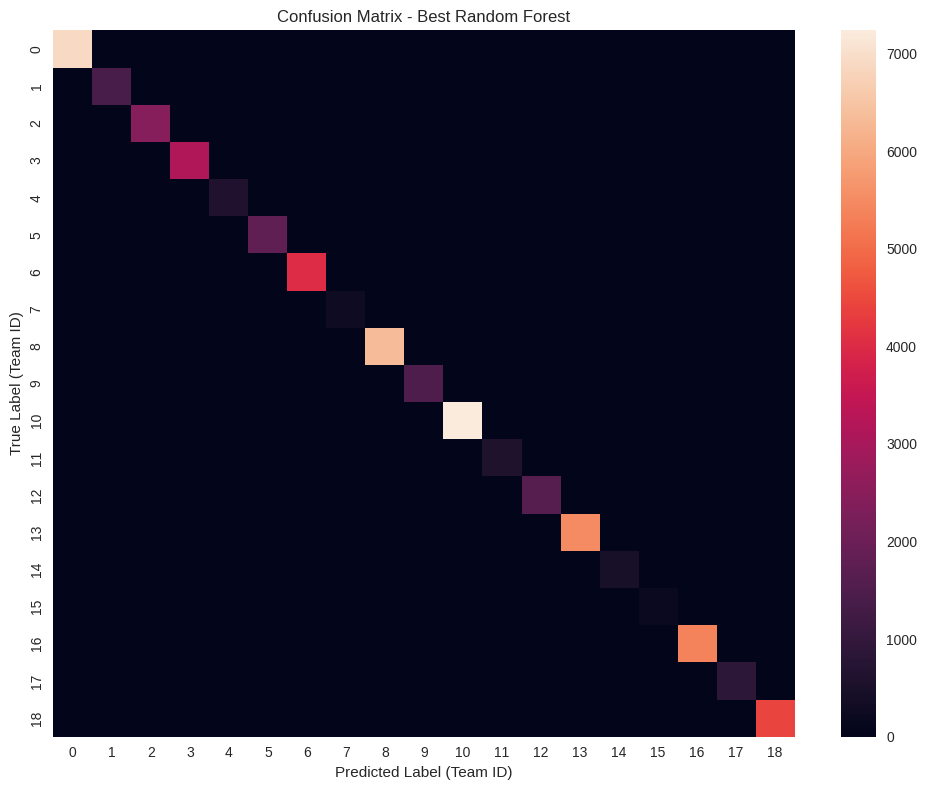

In [107]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_rf_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, fmt="d")
plt.title("Confusion Matrix - Best Random Forest")
plt.xlabel("Predicted Label (Team ID)")
plt.ylabel("True Label (Team ID)")
plt.tight_layout()
plt.show()

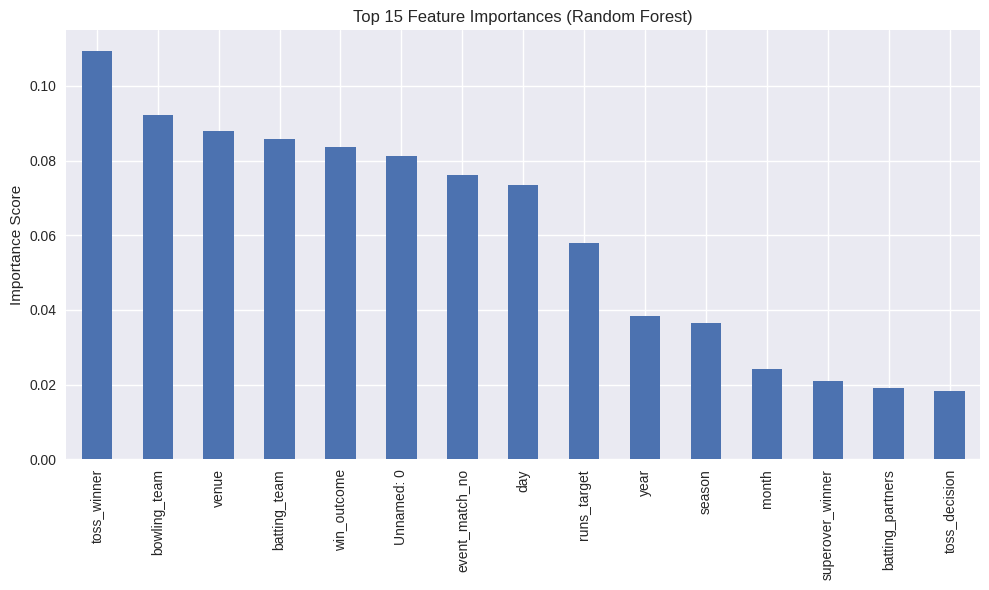

In [108]:
# Feature Importance (Top 15 features)
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_importances.plot(kind="bar")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [109]:
print("Top 15 Important Features:")
print(top_importances)

Top 15 Important Features:
toss_winner         0.109411
bowling_team        0.092305
venue               0.088024
batting_team        0.085741
win_outcome         0.083740
Unnamed: 0          0.081230
event_match_no      0.076074
day                 0.073357
runs_target         0.057794
year                0.038285
season              0.036580
month               0.024134
superover_winner    0.020870
batting_partners    0.018984
toss_decision       0.018275
dtype: float64


**# 12. IPL 2026 Winner Team Prediction (Logic)**

Here we are using a simple, data-driven logic:
1. Calculate each team's historical win percentage (already done).
2. The team with the highest win percentage is considered the "favorite" to predict the IPL 2026 winner.
3. Convert the encoded team ID back to the original team name.

In [110]:
# Ensure win_percentage index and team_le mapping align
# Index: encoded team ID
sorted_win_perc = win_percentage.sort_values(ascending=False)

In [111]:
print("Win Percentage (High to Low) with Original Team Names:")
favorites = []
for team_id, wp in sorted_win_perc.items():
    # team_id -> original name
    team_name = team_id_to_name.get(team_id, f"Unknown_{team_id}")
    favorites.append((team_name, wp))
    print(f"Team: {team_name:20s} | Win %: {wp:.2f}")

Win Percentage (High to Low) with Original Team Names:
Team: Rising Pune Supergiant | Win %: 62.25
Team: Gujarat Titans       | Win %: 62.17
Team: Royal Challengers Bengaluru | Win %: 60.04
Team: Chennai Super Kings  | Win %: 57.07
Team: Mumbai Indians       | Win %: 55.07
Team: Lucknow Super Giants | Win %: 53.22
Team: Kolkata Knight Riders | Win %: 52.10
Team: Delhi Capitals       | Win %: 50.65
Team: Rajasthan Royals     | Win %: 50.04
Team: Sunrisers Hyderabad  | Win %: 48.60
Team: Royal Challengers Bangalore | Win %: 48.31
Team: Punjab Kings         | Win %: 47.27
Team: Kings XI Punjab      | Win %: 45.73
Team: Gujarat Lions        | Win %: 44.73
Team: Delhi Daredevils     | Win %: 42.39
Team: Kochi Tuskers Kerala | Win %: 41.36
Team: Deccan Chargers      | Win %: 38.80
Team: Rising Pune Supergiants | Win %: 34.59
Team: Pune Warriors        | Win %: 26.60


In [113]:
# Top 1 = predicted winner, Top 3 = strong contenders
predicted_winner_name = favorites[0][0]

print("PREDICTED IPL 2026 WINNER (BASED ON HISTORICAL DATA)")
print(f"According to this ML-based analysis, the team")
print(f"with the strongest historical performance and")
print(f"highest winning percentage is: **{predicted_winner_name}**")
print("So our system predicts this team as the strongest")
print("contender to win IPL 2026 (purely based on past data).")

PREDICTED IPL 2026 WINNER (BASED ON HISTORICAL DATA)
According to this ML-based analysis, the team
with the strongest historical performance and
highest winning percentage is: **Rising Pune Supergiant**
So our system predicts this team as the strongest
contender to win IPL 2026 (purely based on past data).


In [114]:
# Top 3 favourites
print("Top 3 Favourite Teams for IPL 2026 (Based on Win %):")
for i, (name, wp) in enumerate(favorites[:3], start=1):
    print(f"{i}. {name}  ->  {wp:.2f}% win rate")

Top 3 Favourite Teams for IPL 2026 (Based on Win %):
1. Rising Pune Supergiant  ->  62.25% win rate
2. Gujarat Titans  ->  62.17% win rate
3. Royal Challengers Bengaluru  ->  60.04% win rate
